# Exponential (Poisson) Window

$$
w[n] = e^{-\alpha|n-\frac{N - \mathrm{1}_{symmetric}}{2}|}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as dsp
from scipy import fft
import IPython.display as display
from zplot import zplot
from compare import compare

In [2]:
def exponential(N, sym=False, alpha=1.0):
    """
    Return a Exponential (Poission) window.

    Args:
        N: Number of points in the output window. 
        If zero or less, an empty array is returned.
        sym: When True (default), generates a symmetric window, 
        for use in filter design. When False, generates a 
        periodic window, for use in spectral analysis.

    Returns:
        the Exponential (Poission) window of length N with given symmetry

    """
    n = np.arange(N)
    N = (N - 1 if sym else N) / 2
    return np.exp(-alpha * abs(n - N) / N)

In [3]:
list(exponential(7, False, 0.5))

[0.6065306597126334,
 0.6996725373751304,
 0.8071177470053893,
 0.9310627797040227,
 0.9310627797040227,
 0.8071177470053893,
 0.6996725373751304]

In [4]:
list(exponential(8, False, 0.5))

[0.6065306597126334,
 0.6872892787909722,
 0.7788007830714049,
 0.8824969025845955,
 1.0,
 0.8824969025845955,
 0.7788007830714049,
 0.6872892787909722]

In [5]:
list(exponential(7, True, 0.5))

[0.6065306597126334,
 0.7165313105737893,
 0.8464817248906141,
 1.0,
 0.8464817248906141,
 0.7165313105737893,
 0.6065306597126334]

In [6]:
list(exponential(8, True, 0.5))

[0.6065306597126334,
 0.6996725373751304,
 0.8071177470053893,
 0.9310627797040227,
 0.9310627797040227,
 0.8071177470053893,
 0.6996725373751304,
 0.6065306597126334]

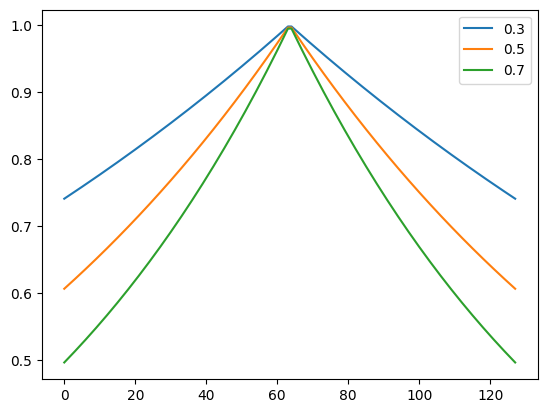

In [7]:
plt.plot(list(exponential(128, True, 0.3)), label='0.3')
plt.plot(list(exponential(128, True, 0.5)), label='0.5')
plt.plot(list(exponential(128, True, 0.7)), label='0.7')
plt.legend()

## Asymmetric

### Odd

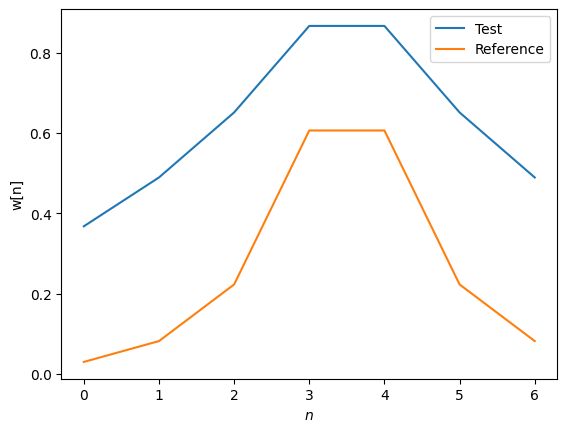

In [8]:
test, reference = compare(7, exponential, dsp.exponential, False)

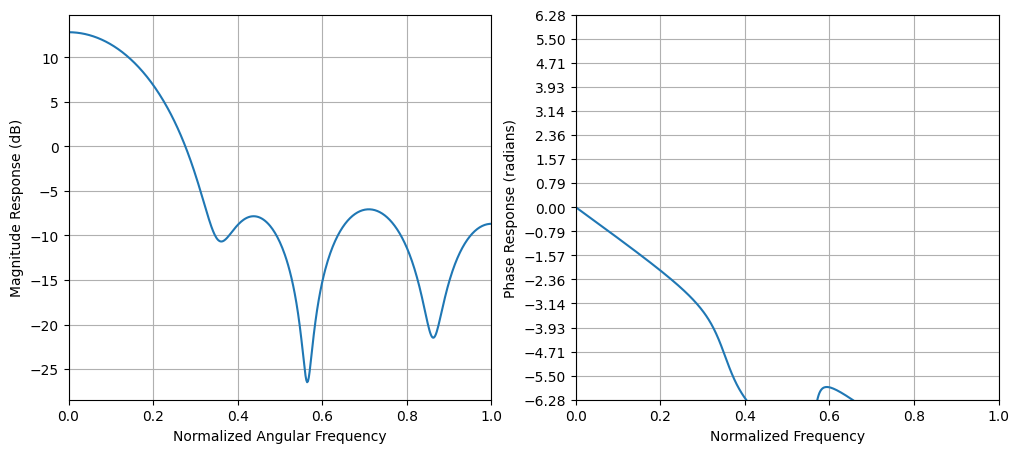

In [9]:
_ = dsp.freqz(test, plot=zplot)

In [10]:
list(test)

[0.36787944117144233,
 0.4895416595569531,
 0.6514390575310556,
 0.8668778997501816,
 0.8668778997501816,
 0.6514390575310556,
 0.4895416595569531]

In [11]:
list(reference)

[0.0301973834223185,
 0.0820849986238988,
 0.22313016014842982,
 0.6065306597126334,
 0.6065306597126334,
 0.22313016014842982,
 0.0820849986238988]

### Even

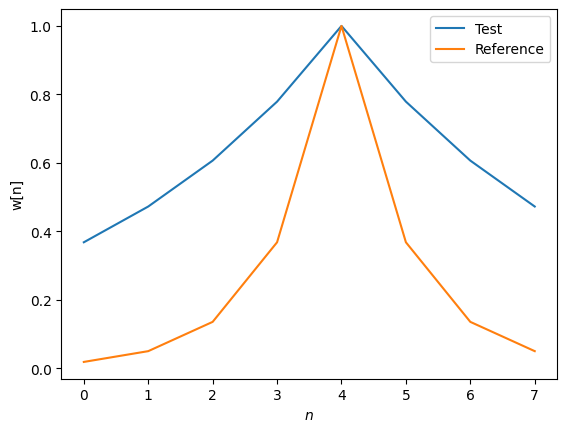

In [12]:
test, reference = compare(8, exponential, dsp.exponential, False)

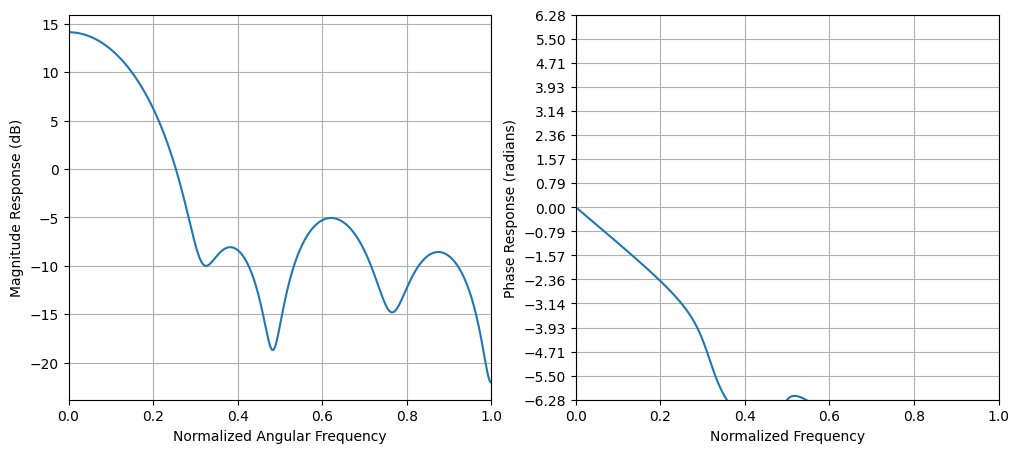

In [13]:
_ = dsp.freqz(test, plot=zplot)

In [14]:
list(test)

[0.36787944117144233,
 0.4723665527410147,
 0.6065306597126334,
 0.7788007830714049,
 1.0,
 0.7788007830714049,
 0.6065306597126334,
 0.4723665527410147]

In [15]:
list(reference)

[0.01831563888873418,
 0.049787068367863944,
 0.1353352832366127,
 0.36787944117144233,
 1.0,
 0.36787944117144233,
 0.1353352832366127,
 0.049787068367863944]

## Symmetric

### Odd

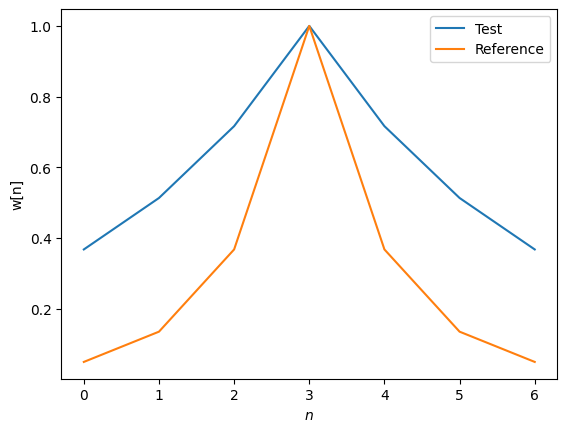

In [16]:
test, reference = compare(7, exponential, dsp.exponential, True)

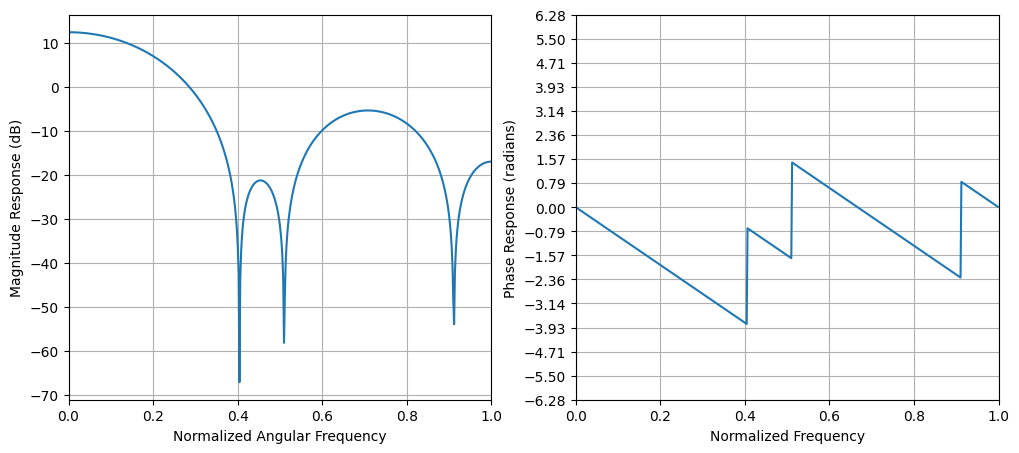

In [17]:
_ = dsp.freqz(test, plot=zplot)

In [18]:
list(test)

[0.36787944117144233,
 0.513417119032592,
 0.7165313105737893,
 1.0,
 0.7165313105737893,
 0.513417119032592,
 0.36787944117144233]

In [19]:
list(reference)

[0.049787068367863944,
 0.1353352832366127,
 0.36787944117144233,
 1.0,
 0.36787944117144233,
 0.1353352832366127,
 0.049787068367863944]

### Even

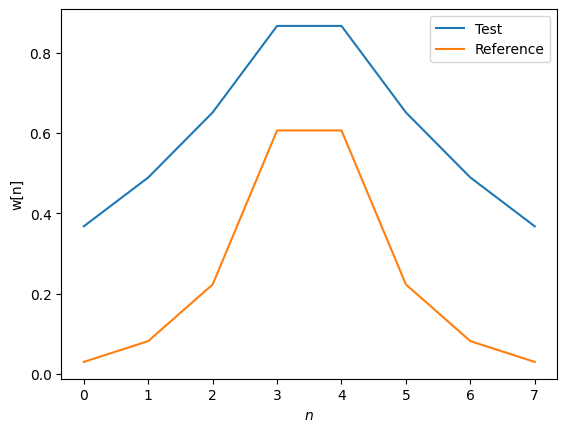

In [20]:
test, reference = compare(8, exponential, dsp.exponential, True)

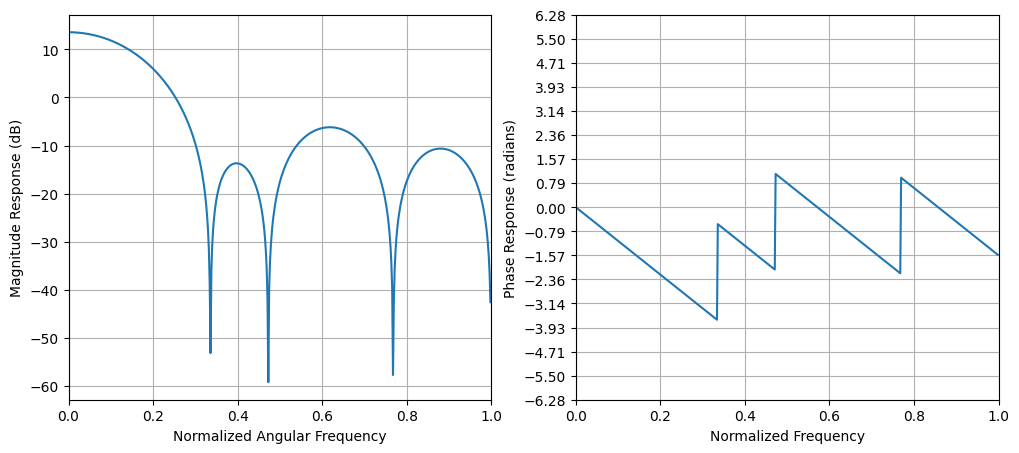

In [21]:
_ = dsp.freqz(test, plot=zplot)

In [22]:
list(test)

[0.36787944117144233,
 0.4895416595569531,
 0.6514390575310556,
 0.8668778997501816,
 0.8668778997501816,
 0.6514390575310556,
 0.4895416595569531,
 0.36787944117144233]

In [23]:
list(reference)

[0.0301973834223185,
 0.0820849986238988,
 0.22313016014842982,
 0.6065306597126334,
 0.6065306597126334,
 0.22313016014842982,
 0.0820849986238988,
 0.0301973834223185]

## Coherent Gain

In [24]:
exponential(1024, False, 0.3).mean()

0.8639392891117743

In [25]:
exponential(1024, False, 0.5).mean()

0.7869387431149995

In [26]:
exponential(1024, False, 0.7).mean()

0.7191639637484097

## Side-lobe amplitude

(-34.04724637055084, 1.0)

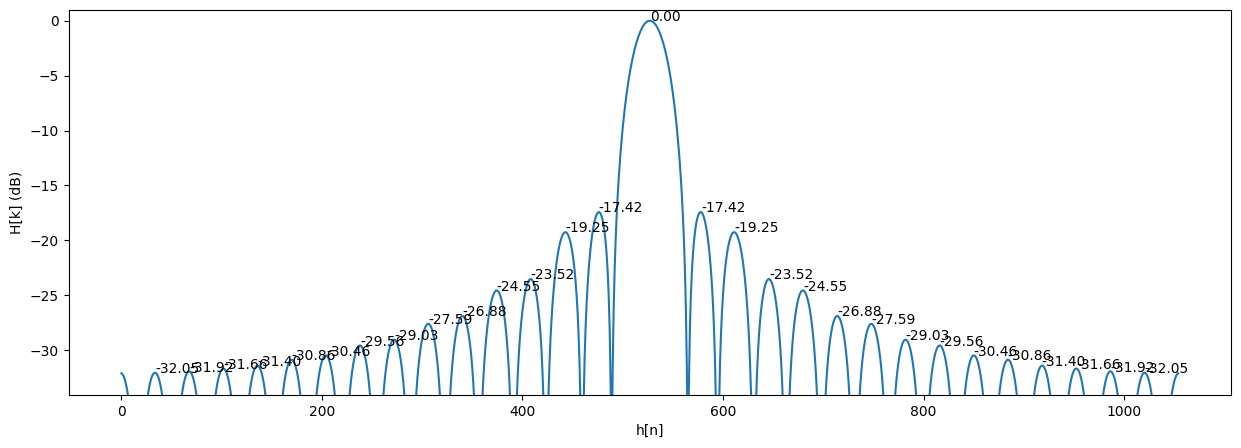

In [27]:
w = exponential(31, False, 0.5)
w = np.pad(w, (512, 512))
H = fft.fft(w)
H = fft.fftshift(H)
H = 20 * np.log10(np.abs(H) + 1e-12)
H = H - H.max()
peaks, _ = dsp.find_peaks(H)
ymin = H[peaks[len(peaks)//2:]][-1] - 1
plt.figure(figsize=(15, 5))
plt.plot(H)
for x, y in zip(peaks, H[peaks]):
    if y > ymin:
        plt.text(x, y, f'{y:.2f}')
plt.ylabel('H[k] (dB)')
plt.xlabel('h[n]')
plt.ylim(ymin - 1, 1)
# sorted(H[peaks], reverse=True)[1]